<a href="https://colab.research.google.com/github/Wiryawanadip/UTS-Mechine-Learning-Fundamentals/blob/main/UTS2_G_211_21_0059.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# Untuk Menampilkan data csv 10 teratas
data = pd.read_csv('CarPrice_Assignment.csv')
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [29]:
# Untuk melihat informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# Mencari nilai
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
# Menghapus atribut car_ID
data.drop(['car_ID'], axis=1, inplace=True)

In [ ]:
# Dimensi data
data.shape

(205, 25)

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

# Mengkonversi data categorial ke numeric
data['CarName'] = enc.fit_transform(data['CarName'].values)
data['fueltype'] = enc.fit_transform(data['fueltype'].values)
data['aspiration'] = enc.fit_transform(data['aspiration'].values)
data['doornumber'] = enc.fit_transform(data['doornumber'].values)
data['carbody'] = enc.fit_transform(data['carbody'].values)
data['drivewheel'] = enc.fit_transform(data['drivewheel'].values)
data['enginelocation'] = enc.fit_transform(data['enginelocation'].values)
data['enginetype'] = enc.fit_transform(data['enginetype'].values)
data['cylindernumber'] = enc.fit_transform(data['cylindernumber'].values)
data['fuelsystem'] = enc.fit_transform(data['fuelsystem'].values)

In [ ]:
# Menentukan nilai X
atr_data = data.drop(columns='compressionratio')
atr_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,3,152,5,2.68,3.47,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,2,109,5,3.19,3.40,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,1,136,5,3.19,3.40,115,5500,18,22,17450.0


In [ ]:
# Mengubah data ke int untuk menentukan compressionratio
cls_data = data['compressionratio'].astype(int)
cls_data.head(3)

0    9
1    9
2    9
Name: compressionratio, dtype: int64

In [ ]:
# Masuk ke Algoritma Dicision Tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Berfungsi untuk membagi data training dan testing
x_train, x_test, y_train, y_test = train_test_split(atr_data, cls_data, test_size = 0.2, random_state = 1)
tree_data = DecisionTreeClassifier (random_state = 1)
tree_data.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
# Menampilkan hasil akurasi
print("Nilai akurasi pada data testing :", tree_data.score(x_test, y_test))

Nilai akurasi pada data testing : 0.8292682926829268


In [ ]:
# Import Decision Tree
from sklearn.tree import export_graphviz
export_graphviz(tree_data, out_file="tree_price.dot", feature_names=atr_data.columns, impurity=False, filled=True)

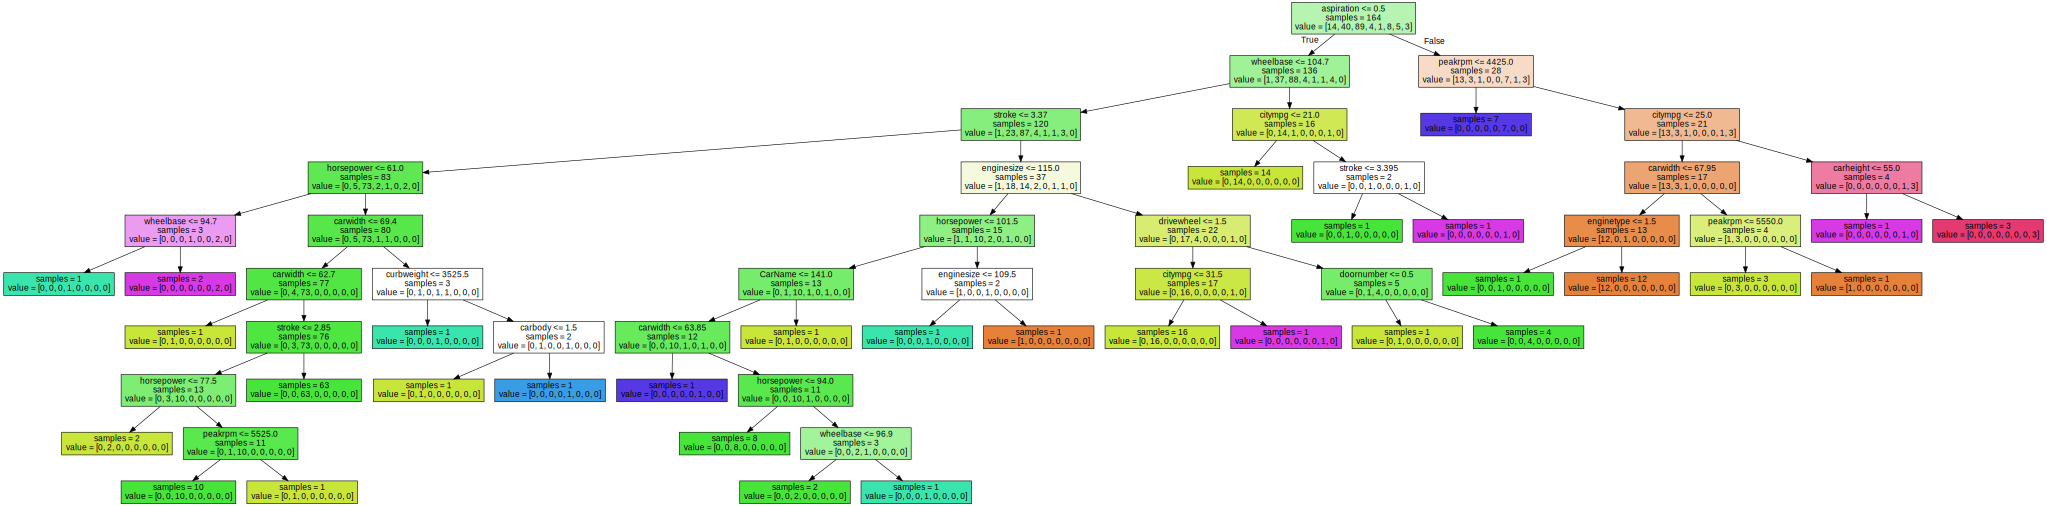

In [ ]:
# Menampilkan Grafik
import graphviz
with open("tree_price.dot")as fig:
  dot_graph = fig.read()
graphviz.Source(dot_graph)